In [27]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import pathlib
import re
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [1]:
symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)
    
symbols_list.remove('scbtc') # bad

returns_folder_name = "full_returns"
    
ts_list = []
for symbol in symbols_list:
    save_file_name = symbol + '.csv.gz'
    save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
    df = pd.read_csv(save_path, compression='gzip')
    ts_list.append(df['log_return'].rename(symbol))
all_returns_df = pd.concat(ts_list, axis=1)

In [30]:
increment = 1440
squared_returns = all_returns_df.pow(2)
volatilities = squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)
volatilities['market'] = volatilities.mean(axis=1)
datetime = volatilities.index.to_series().apply(lambda x: dt.datetime(2019, 5, 1) + dt.timedelta(minutes=x*increment))
volatilities = pd.concat([volatilities, datetime], axis=1)
volatilities.rename(columns={0: 'date'}, inplace=True)

In [61]:
volatilities.date + pd.tseries.offsets.MonthEnd(0)

0      2019-05-31
1      2019-05-31
2      2019-05-31
3      2019-05-31
4      2019-05-31
          ...    
1091   2022-04-30
1092   2022-04-30
1093   2022-04-30
1094   2022-04-30
1095   2022-04-30
Name: date, Length: 1096, dtype: datetime64[ns]

In [62]:
volatilities['end'] = volatilities.date + pd.tseries.offsets.MonthEnd(0)

In [63]:
non_market = volatilities.drop(['date', 'end', 'market'], axis=1)
non_market.apply(lambda x: sp.stats.linregress(volatilities.market, x))

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
0,0.870,1.012,0.606,0.971,0.933,0.943,1.018,0.918,1.242,0.858,...,0.694,1.075,1.198,0.606,1.153,1.100,1.148,0.976,1.113,1.012
1,-0.001,0.000,0.001,0.006,-0.003,-0.002,-0.003,-0.005,-0.009,-0.001,...,0.008,-0.001,-0.004,0.018,-0.005,-0.002,0.011,-0.002,0.002,0.008
2,0.742,0.801,0.810,0.689,0.780,0.782,0.830,0.777,0.770,0.841,...,0.759,0.772,0.767,0.404,0.777,0.830,0.546,0.718,0.651,0.543
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.024,0.023,0.013,0.031,0.023,0.023,0.021,0.023,0.031,0.017,...,0.018,0.027,0.030,0.042,0.028,0.022,0.053,0.029,0.039,0.047


In [52]:
non_market = volatilities.drop(['date', 'end', 'market'], axis=1)
non_market.apply(lambda x: sp.stats.linregress(volatilities.market, x)).loc[2,:].pow(2)
# the loc[2,:] gives the rvalue of the regression

bnbbtc    0.550
adabtc    0.642
ethbtc    0.656
batbtc    0.474
btcusdc   0.609
btcusdt   0.612
neobtc    0.689
btctusd   0.603
etcbtc    0.593
ltcbtc    0.707
xrpbtc    0.538
trxbtc    0.636
eosbtc    0.703
xmrbtc    0.576
zecbtc    0.597
qtumbtc   0.589
dcrbtc    0.163
xlmbtc    0.604
iotabtc   0.689
manabtc   0.298
dashbtc   0.515
zrxbtc    0.424
repbtc    0.295
Name: 2, dtype: float64

In [59]:
volatilities['date']

0      2019-05-01
1      2019-05-02
2      2019-05-03
3      2019-05-04
4      2019-05-05
          ...    
1091   2022-04-26
1092   2022-04-27
1093   2022-04-28
1094   2022-04-29
1095   2022-04-30
Name: date, Length: 1096, dtype: datetime64[ns]

In [55]:
volatilities.groupby('end').groups.keys()

dict_keys([Timestamp('2019-05-31 00:00:00'), Timestamp('2019-06-30 00:00:00'), Timestamp('2019-07-31 00:00:00'), Timestamp('2019-08-31 00:00:00'), Timestamp('2019-09-30 00:00:00'), Timestamp('2019-10-31 00:00:00'), Timestamp('2019-11-30 00:00:00'), Timestamp('2019-12-31 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-05-31 00:00:00'), Timestamp('2020-06-30 00:00:00'), Timestamp('2020-07-31 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-30 00:00:00'), Timestamp('2020-10-31 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-31 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-31 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-30 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-08-31 00:00:00'), Timestamp('2021-09-30 00:00:00'), Tim

In [101]:
ts_list

[bnbbtc    0.503
 adabtc    0.878
 ethbtc    0.823
 batbtc    0.288
 btcusdc   0.611
 btcusdt   0.689
 neobtc    0.741
 btctusd   0.594
 etcbtc    0.754
 ltcbtc    0.573
 xrpbtc    0.730
 trxbtc    0.628
 eosbtc    0.512
 xmrbtc    0.550
 zecbtc    0.330
 qtumbtc   0.457
 dcrbtc    0.565
 xlmbtc    0.706
 iotabtc   0.513
 manabtc   0.335
 dashbtc   0.507
 zrxbtc    0.810
 repbtc    0.738
 Name: 2, dtype: float64,
 bnbbtc    0.870
 adabtc    0.837
 ethbtc    0.925
 batbtc    0.909
 btcusdc   0.949
 btcusdt   0.959
 neobtc    0.600
 btctusd   0.950
 etcbtc    0.746
 ltcbtc    0.762
 xrpbtc    0.851
 trxbtc    0.403
 eosbtc    0.639
 xmrbtc    0.817
 zecbtc    0.651
 qtumbtc   0.677
 dcrbtc    0.383
 xlmbtc    0.963
 iotabtc   0.891
 manabtc   0.688
 dashbtc   0.762
 zrxbtc    0.796
 repbtc    0.527
 Name: 2, dtype: float64,
 bnbbtc    0.668
 adabtc    0.653
 ethbtc    0.705
 batbtc    0.469
 btcusdc   0.855
 btcusdt   0.886
 neobtc    0.606
 btctusd   0.858
 etcbtc    0.821
 ltcbtc    0.

In [102]:
pd.concat(ts_list, axis=1)

,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
bnbbtc,0.503,0.870,0.668,0.355,0.678,0.563,0.565,0.754,0.885,0.499,...,0.638,0.236,0.760,0.069,0.251,0.853,0.737,0.285,0.222,0.221
adabtc,0.878,0.837,0.653,0.491,0.822,0.719,0.391,0.598,0.296,0.726,...,0.489,0.097,0.676,0.191,0.560,0.602,0.518,0.464,0.152,0.256
ethbtc,0.823,0.925,0.705,0.608,0.779,0.777,0.777,0.794,0.676,0.784,...,0.447,0.039,0.664,0.056,0.398,0.756,0.784,0.564,0.265,0.221
batbtc,0.288,0.909,0.469,0.489,0.698,0.216,0.380,0.457,0.384,0.760,...,0.286,0.120,0.867,0.564,0.298,0.496,0.454,0.603,0.089,0.337
btcusdc,0.611,0.949,0.855,0.708,0.698,0.899,0.712,0.624,0.296,0.310,...,0.655,0.174,0.610,0.068,0.365,0.804,0.731,0.646,0.209,0.292
btcusdt,0.689,0.959,0.886,0.692,0.712,0.900,0.667,0.612,0.301,0.345,...,0.661,0.158,0.611,0.070,0.388,0.817,0.734,0.631,0.198,0.299
neobtc,0.741,0.600,0.606,0.290,0.885,0.582,0.046,0.099,0.847,0.823,...,0.329,0.621,0.680,0.371,0.655,0.779,0.529,0.247,0.319,0.400
btctusd,0.594,0.950,0.858,0.722,0.680,0.893,0.690,0.638,0.324,0.326,...,0.652,0.150,0.650,0.031,0.418,0.807,0.678,0.612,0.248,0.215
etcbtc,0.754,0.746,0.821,0.070,0.690,0.489,0.449,0.071,0.724,0.563,...,0.606,0.336,0.846,0.444,0.603,0.917,0.542,0.152,0.130,0.147
ltcbtc,0.573,0.762,0.749,0.388,0.630,0.715,0.466,0.699,0.368,0.446,...,0.647,0.364,0.360,0.084,0.412,0.870,0.733,0.273,0.310,0.178


In [106]:
r_squareds_list = []

for group, data in volatilities.groupby('end'):
    
    non_market = data.drop(['date', 'end', 'market'], axis=1)
    r_squareds = non_market.apply(lambda x: sp.stats.linregress(data.market, x)).loc[2,:].pow(2).rename(group, inplace=True)
    
    r_squareds_list.append(r_squareds)
    
s = pd.concat(r_squareds_list, axis=1).mean(axis=0)
s.rename("r_squared", inplace=True)

2019-05-31   0.602
2019-06-30   0.763
2019-07-31   0.653
2019-08-31   0.434
2019-09-30   0.580
2019-10-31   0.615
2019-11-30   0.400
2019-12-31   0.498
2020-01-31   0.576
2020-02-29   0.534
2020-03-31   0.854
2020-04-30   0.552
2020-05-31   0.573
2020-06-30   0.552
2020-07-31   0.597
2020-08-31   0.378
2020-09-30   0.628
2020-10-31   0.441
2020-11-30   0.701
2020-12-31   0.585
2021-01-31   0.490
2021-02-28   0.329
2021-03-31   0.219
2021-04-30   0.481
2021-05-31   0.765
2021-06-30   0.580
2021-07-31   0.402
2021-08-31   0.258
2021-09-30   0.588
2021-10-31   0.254
2021-11-30   0.373
2021-12-31   0.654
2022-01-31   0.538
2022-02-28   0.336
2022-03-31   0.224
2022-04-30   0.273
Name: r_squared, dtype: float64

In [115]:
s.reset_index(drop=True, inplace=True)

In [76]:
commonalities = volatilities[['end']]

In [97]:
month_ends = pd.Series(list(volatilities.groupby('end').groups.keys()), name='month_ends')

In [110]:
month_ends

0    2019-05-31
1    2019-06-30
2    2019-07-31
3    2019-08-31
4    2019-09-30
5    2019-10-31
6    2019-11-30
7    2019-12-31
8    2020-01-31
9    2020-02-29
10   2020-03-31
11   2020-04-30
12   2020-05-31
13   2020-06-30
14   2020-07-31
15   2020-08-31
16   2020-09-30
17   2020-10-31
18   2020-11-30
19   2020-12-31
20   2021-01-31
21   2021-02-28
22   2021-03-31
23   2021-04-30
24   2021-05-31
25   2021-06-30
26   2021-07-31
27   2021-08-31
28   2021-09-30
29   2021-10-31
30   2021-11-30
31   2021-12-31
32   2022-01-31
33   2022-02-28
34   2022-03-31
35   2022-04-30
Name: month_ends, dtype: datetime64[ns]

In [119]:
r_squareds_df = pd.concat([month_ends, s], axis=1)

<AxesSubplot:xlabel='month_ends'>

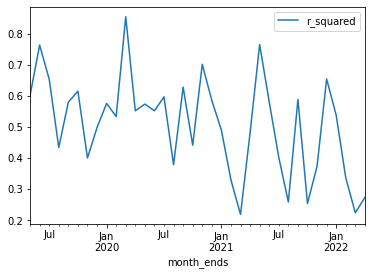

In [122]:
r_squareds_df.plot(x='month_ends', y='r_squared')

In [89]:
commonalities.join(s)

,end,asdf
0,2019-05-31,NaN
1,2019-05-31,NaN
2,2019-05-31,0.602
2,2019-05-31,0.763
2,2019-05-31,0.653
...,...,...
1091,2022-04-30,NaN
1092,2022-04-30,NaN
1093,2022-04-30,NaN
1094,2022-04-30,NaN


In [72]:
volatilities['end']

0      2019-05-31
1      2019-05-31
2      2019-05-31
3      2019-05-31
4      2019-05-31
          ...    
1091   2022-04-30
1092   2022-04-30
1093   2022-04-30
1094   2022-04-30
1095   2022-04-30
Name: end, Length: 1096, dtype: datetime64[ns]

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [22]:
volatilities.apply(lambda x: sp.stats.linregress(volatilities.index, x)).rename(index={0: 'slope', 1: 
                                                                                  'intercept', 2: 'rvalue', 3:
                                                                                  'p-value', 4:'stderr'})

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
slope,0.870,1.012,0.606,0.971,0.933,0.943,1.018,0.918,1.242,0.858,...,0.694,1.075,1.198,0.606,1.153,1.100,1.148,0.976,1.113,1.012
intercept,-0.001,0.000,0.001,0.006,-0.003,-0.002,-0.003,-0.005,-0.009,-0.001,...,0.008,-0.001,-0.004,0.018,-0.005,-0.002,0.011,-0.002,0.002,0.008
rvalue,0.742,0.801,0.810,0.689,0.780,0.782,0.830,0.777,0.770,0.841,...,0.759,0.772,0.767,0.404,0.777,0.830,0.546,0.718,0.651,0.543
p-value,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
stderr,0.024,0.023,0.013,0.031,0.023,0.023,0.021,0.023,0.031,0.017,...,0.018,0.027,0.030,0.042,0.028,0.022,0.053,0.029,0.039,0.047


In [24]:
sp.stats.linregress(volatilities.index, volatilities['bnbbtc'])

LinregressResult(slope=0.8700637786916354, intercept=-0.0013868155675269209, rvalue=0.741808524242756, pvalue=4.689877144140645e-192, stderr=0.02378054284964096, intercept_stderr=0.0010857364370350862)